In [1]:
# The algorithm that need to be implemented in a scalable service

from itertools import count
import numpy as np
import pandas as pd

def nd_rolling(data, window_size):
    """
    data: pandas.core.frame.DataFrame
    window_size: float

    yield: tuple
    """

    sample = list(zip(count(), data.values[:, 0], data.values[:, 1]))
    for idx in range(0, len(sample)):
        idx0 = idx if idx - window_size < 0 else idx - window_size
        window = [it for it in sample
                  if it[0] >= idx0 or it[0] <= idx0 + window_size]
        x = np.array([it[2] for it in window])

        yield {'idx': sample[idx][1],
               'value': sample[idx][2],
               'window_mean': np.mean(x),
               'window_std': np.std(x)}

def get_anomalous_values(data, window_size=100):
    """
    data : pandas.core.frame.DataFrame
    window_size: int

    return: list
    """

    # calculate the moving window for each point, and report the anomaly if
    # the distance of the idx-th point is greater than md times the mahalanobis
    # distance
    return [(p['idx'], p['value']) for p in nd_rolling(data, window_size)
            if abs(p['value'] - p['window_mean']) > 5 * p['window_std']]

In [2]:
# test now the procedure with the test dataset, "x_y_dataset.csv"
data = pd.read_csv("./data/sample.csv")
data.head()

,timestamp,value
0,18:27:26.345,2.335
1,18:27:26.346,2.335
2,18:27:26.347,2.344
3,18:27:26.348,2.347
4,18:27:26.349,2.343


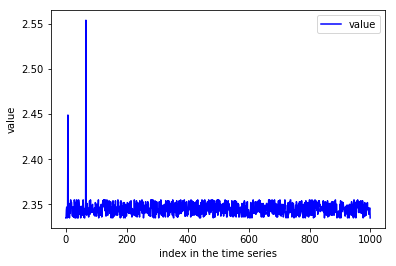

In [5]:
# plot the data
import matplotlib.pyplot as plt
data_plot = data.plot(color = 'b')
data_plot.set_xlabel("index in the time series")
data_plot.set_ylabel("value")
plt.show()

In [6]:
print(get_anomalous_values(data))

[('18:27:26.352', 2.449), ('18:27:26.411', 2.5540000000000003)]
